In [1]:
import numpy as np

X = np.array([['Korea', 44, 7200], ['Japan', 27, 4800], ['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

X[:, 0] = labelencoder.fit_transform(X[:, 0])

print(X)

[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


In [2]:
import numpy as np

X = np.array([['Korea', 44, 7200], ['Japan', 27, 4800], ['China', 30, 6100]])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

# Generate 2-Axis Array to handout
XX = onehotencoder.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(XX)

X = np.delete(X, [0], axis=1)
X = np.concatenate((XX, X), axis = 1)

print(X)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


In [5]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)

print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
49/49 - 2s - 40ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/20
49/49 - 0s - 7ms/step - accuracy: 0.5003 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/20
49/49 - 0s - 7ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/20
49/49 - 1s - 12ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/20
49/49 - 0s - 7ms/step - accuracy: 0.4958 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/20
49/49 - 1s - 13ms/step - accuracy: 0.4946 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/20
49/49 - 1s - 13ms/step - accuracy: 0.4988 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/20
49/49 - 0s - 8ms/step - accuracy: 0.4971 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 9/20
49/49 - 1s - 12ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 10/20
49

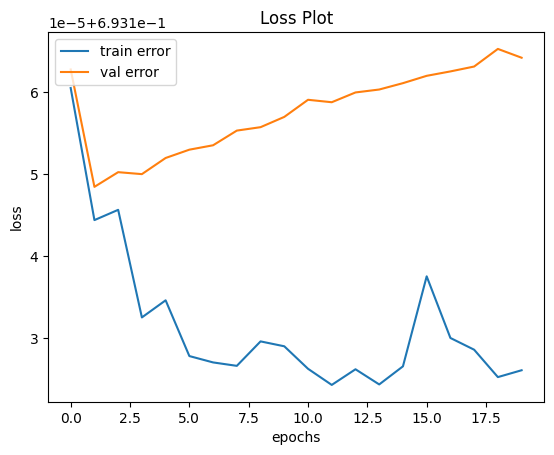

In [6]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetching Data
(train_data, train_labels), (test_data, test_labels) = \
tf.keras.datasets.imdb.load_data( num_words=1000)

# Transforming OneHotEncoder
def one_hot_sequences(sequences, dimension=1000):
  results = numpy.zeros((len(sequences), dimension))

  for i, word_index in enumerate(sequences):
    results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# DNN
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# DNN Training
history = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_data=(test_data, test_labels),verbose=2)

# Graph Output of Loss values

history_dict = history.history
loss_values = history_dict['loss'] # Training Loss
val_loss_values = history_dict['val_loss'] # Value Loss
acc = history_dict['accuracy'] # Accuracy
epochs = range(1, len(acc) + 1) # Epochs Value

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()



Epoch 1/20
49/49 - 2s - 41ms/step - accuracy: 0.4982 - loss: 0.7199 - val_accuracy: 0.5000 - val_loss: 0.7073
Epoch 2/20
49/49 - 0s - 7ms/step - accuracy: 0.4976 - loss: 0.7036 - val_accuracy: 0.5000 - val_loss: 0.7011
Epoch 3/20
49/49 - 1s - 13ms/step - accuracy: 0.5000 - loss: 0.6998 - val_accuracy: 0.5000 - val_loss: 0.6986
Epoch 4/20
49/49 - 0s - 7ms/step - accuracy: 0.4958 - loss: 0.6977 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 5/20
49/49 - 1s - 13ms/step - accuracy: 0.4953 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6956
Epoch 6/20
49/49 - 1s - 12ms/step - accuracy: 0.5000 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6948
Epoch 7/20
49/49 - 1s - 12ms/step - accuracy: 0.5000 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 8/20
49/49 - 1s - 13ms/step - accuracy: 0.4957 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 9/20
49/49 - 1s - 13ms/step - accuracy: 0.4968 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 10/20


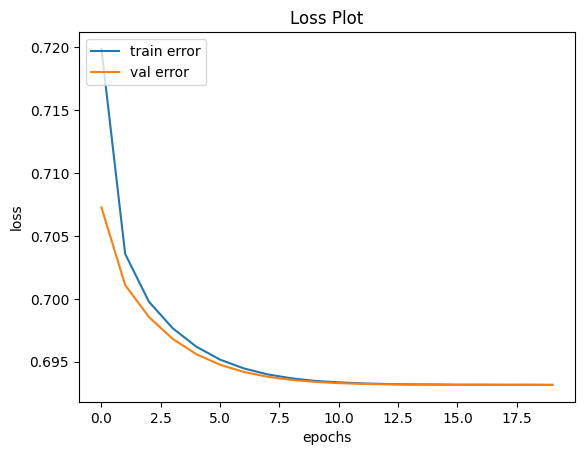

In [8]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetching Data
(train_data, train_labels), (test_data, test_labels) = \
tf.keras.datasets.imdb.load_data( num_words=1000)

# Transforming OneHotEncoder
def one_hot_sequences(sequences, dimension=1000):
  results = numpy.zeros((len(sequences), dimension))

  for i, word_index in enumerate(sequences):
    results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# DNN (Weigh Regulation)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# DNN Training
history = model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_data=(test_data, test_labels),verbose=2)

# Graph Output of Loss values

history_dict = history.history
loss_values = history_dict['loss'] # Training Loss
val_loss_values = history_dict['val_loss'] # Value Loss
acc = history_dict['accuracy'] # Accuracy
epochs = range(1, len(acc) + 1) # Epochs Value

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()



In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#DNN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8938 - loss: 0.3670
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9695 - loss: 0.0996
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9782 - loss: 0.0686
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9847 - loss: 0.0499
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9873 - loss: 0.0390
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0725


[0.060661546885967255, 0.9818999767303467]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7786 - loss: 0.6362
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8592 - loss: 0.3837
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8757 - loss: 0.3389
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8848 - loss: 0.3156
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8910 - loss: 0.2962
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8720 - loss: 0.3623
정확도: 0.8725000023841858


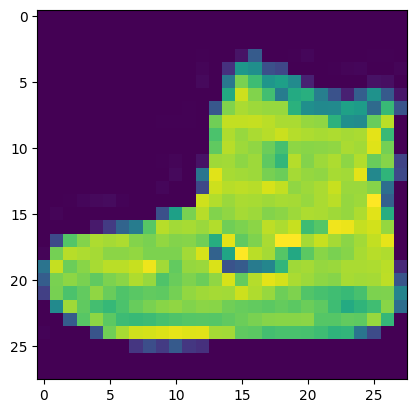

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

#DNN
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('정확도:', test_acc)